In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. Invert Binary Tree - Invert a binary tree

### Idea:
- top - down: search
- bottom - up: invert

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def invertTree(self, root: TreeNode) -> TreeNode:
        if not root:
            return root
        root.left, root.right = self.invertTree(root.right), self.invertTree(root.left)
        return root

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def invertTree(self, root: TreeNode) -> TreeNode:
        if not root:
            return root
        temp = root.left
        root.left = self.invertTree(root.right)
        root.right = self.invertTree(temp)
        return root

# 2. Delete Node in a Linked List

Write a function to delete a node (except the tail) in a singly linked list, given only access to that node.  
Given linked list -- head = [4,5,1,9], which looks like following:

Example 1:  
Input: head = [4,5,1,9], node = 5  
Output: [4,1,9]  
Explanation: You are given the second node with value 5, the linked list should become 4 -> 1 -> 9 after calling your function.

Example 2:  
Input: head = [4,5,1,9], node = 1  
Output: [4,5,9]  
Explanation: You are given the third node with value 1, the linked list should become 4 -> 5 -> 9 after calling your function.

### Idea
- 一般删除一个节点是通过上一个节点来操作.
- 现在只给了当前节点，那么只能将后一节点的值赋给当前节点，将后一节点删掉，则相当于删掉了“当前节点”。

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def deleteNode(self, node):
        """
        :type node: ListNode
        :rtype: void Do not return anything, modify node in-place instead.
        """
        node.val = node.next.val
        node.next = node.next.next

#  3. Two City Scheduling

There are 2N people a company is planning to interview. The cost of flying the i-th person to city A is costs[i][0], and the cost of flying the i-th person to city B is costs[i][1].  
Return the minimum cost to fly every person to a city such that exactly N people arrive in each city.

Example 1:  
Input: [[10,20],[30,200],[400,50],[30,20]]  
Output: 110  
Explanation:     
The first person goes to city A for a cost of 10. 
The second person goes to city A for a cost of 30.  
The third person goes to city B for a cost of 50.  
The fourth person goes to city B for a cost of 20.

The total minimum cost is 10 + 30 + 50 + 20 = 110 to have half the people interviewing in each city.

### Idea:
- 比较去a城和b城的差值，差值负得越多，说明去a城比去b城越划算，正得越多则反之。
- 排序，前N//2个，去a城，其他去b城。

In [32]:
def twoCitySchedCost(costs) -> int:
    N = len(costs)
    diff_AB = [ cost[0]-cost[1] for cost in costs] #A-B
    indices =  sorted(range(0,N), key=lambda k:diff[k])
    result = 0
    for i in range(N//2):
        result += costs[indices[i]][0]
    for i in range(N//2,N):
        result += costs[indices[i]][1]
    return result    

costs = [[10,20],[30,200],[400,50],[30,20]] 
twoCitySchedCost(costs)

110

# 4. Reverse String

Write a function that reverses a string. The input string is given as an array of characters char[].  
Do not allocate extra space for another array, you must do this **by modifying the input array in-place with O(1) extra memory**.  
You may assume all the characters consist of printable ascii characters.

Example 1:  
Input: ["h","e","l","l","o"]  
Output: ["o","l","l","e","h"]  

Example 2:  
Input: ["H","a","n","n","a","h"]  
Output: ["h","a","n","n","a","H"]  

Hide Hint 1: The entire logic for reversing a string is based on using the opposite directional two-pointer approach!

In [5]:
def reverseString(s) -> None:
    for i in range(len(s)//2):
        s[i], s[-i-1] = s[-i-1], s[i]
    return s

s =  ["h","e","l","l","o"]
reverseString(s)

['o', 'l', 'l', 'e', 'h']

# 5. Random Pick with Weight - 528

Given an array w of positive integers, where w[i] describes the weight of index i, write a function pickIndex which randomly picks an index in proportion to its weight.

Note:  
1 <= w.length <= 10000  
1 <= w[i] <= 10^5  
pickIndex will be called at most 10000 times.  

Example 1:  
Input:   
["Solution","pickIndex"]  
[[[1]],[]]  
Output: [null,0]

Example 2:  
Input:   
["Solution","pickIndex","pickIndex","pickIndex","pickIndex","pickIndex"]
[[[1,3]],[],[],[],[],[]]  
Output: [null,0,1,1,1,0]  
Explanation of Input Syntax:    
The input is two lists:    
the subroutines called and their arguments. Solution's constructor has one argument,   
the array w. pickIndex has no arguments. Arguments are always wrapped with a list, even if there aren't any.

题目大意：
要求按照权重挑选索引。比如[1,99]中，有1%的概率挑选到索引0，有99%的概率挑选到索引1.

### Idea:
- 把概率分布函数转化为累计概率分布函数。然后通过随机数，进行二分查找。
- 比如，输入是[1,2,3,4]，那么概率分布是[1/10, 2/10, 3/10, 4/10, 5/10]，累积概率分布是[1/10, 3/10, 6/10, 10/10].总和是10。如果我们产生一个随机数，在1~10之中，然后判断这个数字在哪个区间中就能得到对应的索引。对于输入[1,2,3,4]，计算出来的preSum是[1,3,6,10]，然后随机选一个s， rand() % 10,可以随机出范围 [0, 9],随机到 0 则为第一个点，随机到 1，2，3 则为第二个点，随机到 4，5,6 则为第三个点，所以我们随机出一个数字x后，然后再累加和数组中查找第一个大于随机数x的数字，使用二分查找法可以找到第一个大于随机数x的数字的坐标.

In [ ]:
class Solution:

    def __init__(self, w: List[int]):
        self.preSum = [0] * len(w)  #define preSum - cdf
        self.preSum[0] = w[0]
        for i in range(1, len(w)):
            self.preSum[i] = self.preSum[i - 1] + w[i] 


    def pickIndex(self) -> int:
        total = self.preSum[-1]
        rand = random.randint(0, total - 1)
        left, right = 0, len(self.preSum) - 1
        while left <= right:
            mid = (left + right) // 2
            if rand >= self.preSum[mid]:
                left = mid + 1
            else:
                right = mid - 1
        if rand < self.preSum[left]:
            return left
        return right
    
# Your Solution object will be instantiated and called as such:
# obj = Solution(w)
# param_1 = obj.pickIndex()

# 6. Queue Reconstruction by Height - 406

Suppose you have a random list of people standing in a queue. Each person is described by a pair of integers (h, k), where h is the height of the person and k is the number of people in front of this person who have a height greater than or equal to h. Write an algorithm to reconstruct the queue.

Note:
The number of people is less than 1,100.

Example  
Input:
[[7,0], [4,4], [7,1], [5,0], [6,1], [5,2]]    
Output:
[[5,0], [7,0], [5,2], [6,1], [4,4], [7,1]]

Hide Hint #1  
What can you say about the position of the shortest person?
If the position of the shortest person is i, how many people would be in front of the shortest person?  
Hide Hint #2  
Once you fix the position of the shortest person, what can you say about the position of the second shortest person?

### Idea:
reconstruction of the queue to satisfy the k from ech person [h,k]
- 1. ranking according to the height descending, if same height, according to "k" ascending. **2 conditions sorting**
- 2. for loop to insert it to the k-th position.

In [30]:
def reconstructQueue(people):
    people.sort(key=lambda x:(-x[0],x[1]),reverse=True)
    result = []
    for person in people:
        result.insert(person[1],person)
    return result

people = [[7,0], [4,4], [7,1], [5,0], [6,1], [5,2]]
reconstructQueue(people)

[[7, 0], [5, 0], [7, 1], [6, 1], [4, 4], [5, 2]]

# 7. Coin Change 2 - DP

You are given coins of different denominations and a total amount of money. Write a function to compute the number of combinations that make up that amount. You may assume that you have infinite number of each kind of coin.

Example 1:  
Input: amount = 5, coins = [1, 2, 5]  
Output: 4  
Explanation: there are four ways to make up the amount:  
5=5  
5=2+2+1  
5=2+1+1+1  
5=1+1+1+1+1 

Example 2:  
Input: amount = 3, coins = [2]  
Output: 0  
Explanation: the amount of 3 cannot be made up just with coins of 2. 

Example 3:  
Input: amount = 10, coins = [10]   
Output: 1  
 
Note:   
You can assume that  
0 <= amount <= 5000
1 <= coin <= 5000  
the number of coins is less than 500  
the answer is guaranteed to fit into signed 32-bit integer  

### Idea:
- muti-dimensional compress to 1d dp matrix 
- dp[i]: how many ways to make up amount i using first 1/2/3 coins.(accumulate)
- col: 0,1,2,3,4,5: amount
- row: types of coins

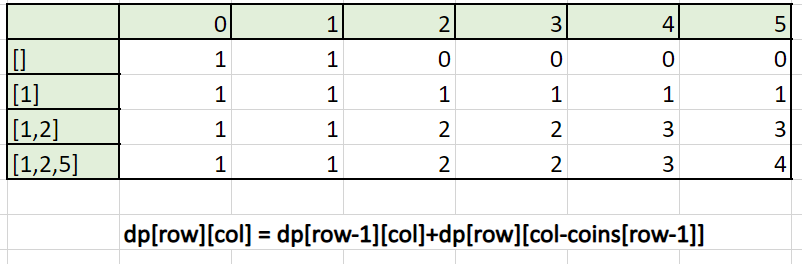

In [31]:
from IPython.display import Image
Image(filename = 'June7.jpg', width=400, height=500)

In [25]:
def change(amount: int, coins) -> int:
    dp = [0] * (amount + 1)
    dp[0] = 1
    for coin in coins:
        for i in range(1, amount + 1):
            if coin <= i:
                dp[i] += dp[i - coin]
                print("coin:",coin,"i:",i,dp)
    return dp[amount]

In [26]:
amount = 5
coins = [1, 2, 5]
change(amount, coins)

[1, 0, 0, 0, 0, 0]
coin: 1 i: 1 [1, 1, 0, 0, 0, 0]
coin: 1 i: 2 [1, 1, 1, 0, 0, 0]
coin: 1 i: 3 [1, 1, 1, 1, 0, 0]
coin: 1 i: 4 [1, 1, 1, 1, 1, 0]
coin: 1 i: 5 [1, 1, 1, 1, 1, 1]
coin: 2 i: 2 [1, 1, 2, 1, 1, 1]
coin: 2 i: 3 [1, 1, 2, 2, 1, 1]
coin: 2 i: 4 [1, 1, 2, 2, 3, 1]
coin: 2 i: 5 [1, 1, 2, 2, 3, 3]
coin: 5 i: 5 [1, 1, 2, 2, 3, 4]


4

# 8. Power of Two

Given an integer, write a function to determine if it is a power of two.

Example 1:  
Input: 1  
Output: true   
Explanation: 2^0 = 1

Example 2:  
Input: 16  
Output: true  
Explanation: 24 = 16

Example 3:  
Input: 218  
Output: false

### Idea
- Binary Search - Time Exceeding XXX
- Solution 1 - while loop - n/2

In [15]:
def isPowerOfTwo(n: int) -> bool:
    while n > 1:
        n /= 2
    return n==1

isPowerOfTwo(1)
isPowerOfTwo(16)
isPowerOfTwo(218)

True

True

False

### Solution 2 
- utilize **n&(n-1)**"
- n&(n-1)==0，n的最高有效位为1，其余位为0。因此，n的值是2的某次方。所以，(n&(n-1))==0检查n是否为2的某次方（或者检查n是否为0）

In [18]:
def isPowerOfTwo(n: int) -> bool:
    return n > 0 and not (n & n-1)
isPowerOfTwo(1)
isPowerOfTwo(16)
isPowerOfTwo(218)

True

True

False

# 9. Is Subsequence

Given a string s and a string t, check if s is subsequence of t.  
A subsequence of a string is a new string which is formed from the original string by deleting some (can be none) of the characters without disturbing the relative positions of the remaining characters. (ie, "ace" is a subsequence of "abcde" while "aec" is not).

Follow up:
If there are lots of incoming S, say S1, S2, ... , Sk where k >= 1B, and you want to check one by one to see if T has its subsequence. In this scenario, how would you change your code?

Credits:
Special thanks to @pbrother for adding this problem and creating all test cases.

Example 1:  
Input: s = "abc", t = "ahbgdc"  
Output: true  

Example 2: 
Input: s = "axc", t = "ahbgdc"  
Output: false

Constraints:  
0 <= s.length <= 100  
0 <= t.length <= 10^4  
Both strings consists only of lowercase characters

### Idea:
- 2 pointers + while loop
- when equal,count+=1,2 pointers move to next char
- when not, pointer of t move one step, keep searching
- return count == len(s),means all chars in str s can found in str t in order

In [11]:
 def isSubsequence(s: str, t: str) -> bool:
        if not s or s == t:
            return True
        if not t:
            return False
        
        count = 0
        i, j = 0, 0
        while i<len(s) and j < len(t):
            if s[i] == t[j]:
                count += 1
                i += 1
                j += 1
        
            else: 
                j += 1
        return count == len(s)

In [12]:
s = "abc" 
t = "ahbgdc"
isSubsequence(s,t)

True

# 10. Search Insert Position

Given a sorted array and a target value, return the index if the target is found. If not, return the index where it would be if it were inserted in order. 
You may assume no duplicates in the array.

Example 1:  
Input: [1,3,5,6], 5  
Output: 2  
    
Example 2:  
Input: [1,3,5,6], 2  
Output: 1
    
Example 3:  
Input: [1,3,5,6], 7  
Output: 4
    
Example 4:  
Input: [1,3,5,6], 0  
Output: 0

In [19]:
def searchInsert(nums, target) -> int:
    if target > nums[-1]:
        return len(nums)
    for i in range(len(nums)):
        if nums[i] >= target:
            return i 

In [20]:
nums = [1,3,5,6]
target = 5
searchInsert(nums, target)
target = 2
searchInsert(nums, target)
target = 7
searchInsert(nums, target)
target = 0
searchInsert(nums, target)

2

1

4

0

#  Sort Colors

Given an array with n objects colored red, white or blue, sort them in-place so that objects of the same color are adjacent, with the colors in the order red, white and blue.  
Here, we will use the integers 0, 1, and 2 to represent the color red, white, and blue respectively.  
Note: You are not suppose to use the library's sort function for this problem.

Example:  
Input: [2,0,2,1,1,0]  
Output: [0,0,1,1,2,2]  
Follow up:  
A rather straight forward solution is a two-pass algorithm using counting sort.  
First, iterate the array counting number of 0's, 1's, and 2's, then overwrite array with total number of 0's, then 1's and followed by 2's.  
Could you come up with a one-pass algorithm using only constant space?

In [12]:
def sortColors(nums) -> None:
    p, q = 0, 0
    k = len(nums)-1
    while q<=k:
        if p<=q and nums[q]==0:
            nums[p],nums[q] = nums[q],nums[p]
            p += 1
            print(nums,p,q,k)
        elif p<=k and nums[p]==2:
            nums[p],nums[k] = nums[k],nums[p]
            k -= 1
            print(nums,p,q,k)
        else:
            q += 1
            print(nums,p,q,k)
    return nums   

In [13]:
nums = [2,0,2,1,1,0]
sortColors(nums)

[0, 0, 2, 1, 1, 2] 0 0 4
[0, 0, 2, 1, 1, 2] 1 0 4
[0, 0, 2, 1, 1, 2] 1 1 4
[0, 0, 2, 1, 1, 2] 2 1 4
[0, 0, 1, 1, 2, 2] 2 1 3
[0, 0, 1, 1, 2, 2] 2 2 3
[0, 0, 1, 1, 2, 2] 2 3 3
[0, 0, 1, 1, 2, 2] 2 4 3


[0, 0, 1, 1, 2, 2]

# 12. Insert Delete GetRandom O(1)

Design a data structure that supports all following operations in average O(1) time.  
insert(val): Inserts an item val to the set if not already present.  
remove(val): Removes an item val from the set if present.  
getRandom: Returns a random element from current set of elements. Each element must have the same probability of being returned.

Example:   
// Init an empty set.  
RandomizedSet randomSet = new RandomizedSet();  

// Inserts 1 to the set. Returns true as 1 was inserted successfully.  
randomSet.insert(1);

// Returns false as 2 does not exist in the set.  
randomSet.remove(2);

// Inserts 2 to the set, returns true. Set now contains [1,2].  
randomSet.insert(2);

// getRandom should return either 1 or 2 randomly.  
randomSet.getRandom();

// Removes 1 from the set, returns true. Set now contains [2].  
randomSet.remove(1);

// 2 was already in the set, so return false.  
randomSet.insert(2);

// Since 2 is the only number in the set, getRandom always return 2. 
randomSet.getRandom();

### dict + list

In [ ]:
class RandomizedSet:

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.set = set()
        self.size = 0
        
    def insert(self, val: int) -> bool:
        """
        Inserts a value to the set. Returns true if the set did not already contain the specified element.
        """
        if val in self.set:
            self.set.add(val)
            self.size += 1
            return True
        return False

    def remove(self, val: int) -> bool:
        """
        Removes a value from the set. Returns true if the set contained the specified element.
        """
        if val in self.set:
            self.set.remove(val)
            self.size -= 1
            return True
        return False
        

    def getRandom(self) -> int:
        """
        Get a random element from the set.
        """
        return list(self.set)[random.randit(0,self.size-1)]
        # return random.choice(self.set)

# Your RandomizedSet object will be instantiated and called as such:
# obj = RandomizedSet()
# param_1 = obj.insert(val)
# param_2 = obj.remove(val)
# param_3 = obj.getRandom()

In [ ]:
class RandomizedSet:

    def __init__(self):
        self.dict = {}
        self.list = []
        

    def insert(self, val: int) -> bool:
        if val in self.index:
            return False
        self.list.append(val)
        self.dict[val] = len(self.list) - 1
        return True
        

    def remove(self, val: int) -> bool:
        if val not in self.dict:
            return False
        i = self.dict[val]
        self.list[i] = self.list[-1]
        self.dict[self.list[i]] = i
        del self.list[-1]
        del self.dict[val]
        return True
        

    def getRandom(self) -> int:
        return random.choice(self.list)
        


# Your RandomizedSet object will be instantiated and called as such:
# obj = RandomizedSet()
# param_1 = obj.insert(val)
# param_2 = obj.remove(val)
# param_3 = obj.getRandom()

# 13. Largest Divisible Subset - DP

Given a set of distinct positive integers, find the largest subset such that every pair (Si, Sj) of elements in this subset satisfies:  
Si % Sj = 0 or Sj % Si = 0.  
If there are multiple solutions, return any subset is fine.

Example 1:  
Input: [1,2,3]  
Output: [1,2] (of course, [1,3] will also be ok)  

Example 2:  
Input: [1,2,4,8]  
Output: [1,2,4,8]

### Idea: - DP
- dp is to store the largest divisible subset of current num
- for loop num in nums
    - based on  the current num "n", divide the front nums "s" one by one, if n%s == 0, add it to the list. update the dp.
    - from them select the largest length set.
- return the last list of dp

In [25]:
def largestDivisibleSubset(nums):
    dp = [[]]
    for n in sorted(nums):
        dp.append([n]+max((s for s in dp if not s or n%s[0]==0),key=len))
        print(n,dp)
    return max(dp, key=len)[::-1]

nums = [1,2,4,3,9,27]
largestDivisibleSubset(nums)

1 [[], [1]]
2 [[], [1], [2, 1]]
3 [[], [1], [2, 1], [3, 1]]
4 [[], [1], [2, 1], [3, 1], [4, 2, 1]]
9 [[], [1], [2, 1], [3, 1], [4, 2, 1], [9, 3, 1]]
27 [[], [1], [2, 1], [3, 1], [4, 2, 1], [9, 3, 1], [27, 9, 3, 1]]


[1, 3, 9, 27]

In [ ]:
def largestDivisibleSubset(self, nums):
    """
    :type nums: List[int]
    :rtype: List[int]
    """
    if not nums: return []
    N = len(nums)
    nums.sort()
    dp = [0] * N #LDS
    parent = [0] * N
    mx = 0
    mx_index = -1
    for i in range(N):
        for j in range(i - 1, -1 , -1):
            if nums[i] % nums[j] == 0 and dp[i] < dp[j] + 1:
                dp[i] = dp[j] + 1
                parent[i] = j
                if dp[i] > mx:
                    mx = dp[i]
                    mx_index = i
    res = list()
    for k in range(mx + 1):
        res.append(nums[mx_index])
        mx_index = parent[mx_index]
    return res[::-1]

# 14. Cheapest Flights Within K Stops

There are n cities connected by m flights. Each flight starts from city u and arrives at v with a price w.  
Now given all the cities and flights, together with starting city src and the destination dst, your task is to find the cheapest price from src to dst with up to k stops. If there is no such route, output -1.

Example 1:
Input:   
n = 3, edges = [[0,1,100],[1,2,100],[0,2,500]]  
src = 0, dst = 2, k = 1  
Output: 200  
Explanation:The graph looks like this:  
The cheapest price from city 0 to city 2 with at most 1 stop costs 200, as marked red in the picture.  

Example 2:  
Input:   
n = 3, edges = [[0,1,100],[1,2,100],[0,2,500]]  
src = 0, dst = 2, k = 0   
Output: 500    
Explanation: The graph looks like this:  
The cheapest price from city 0 to city 2 with at most 0 stop costs 500, as marked blue in the picture.

Constraints:  
The number of nodes n will be in range [1, 100], with nodes labeled from 0 to n - 1.  
The size of flights will be in range [0, n * (n - 1) / 2].  
The format of each flight will be (src, dst, price).  
The price of each flight will be in the range [1, 10000].  
k is in the range of [0, n - 1].  
There will not be any duplicated flights or self cycles.

### Idea:
1. DFS
2. BFS
    - 队列，存放的是当进行第step次搜索时，搜索到的当前的节点，以及走到当前节点的花费。当前节点走到dst时，更新最小花费。
3. Bellman-Ford's Algorithm (based DP)

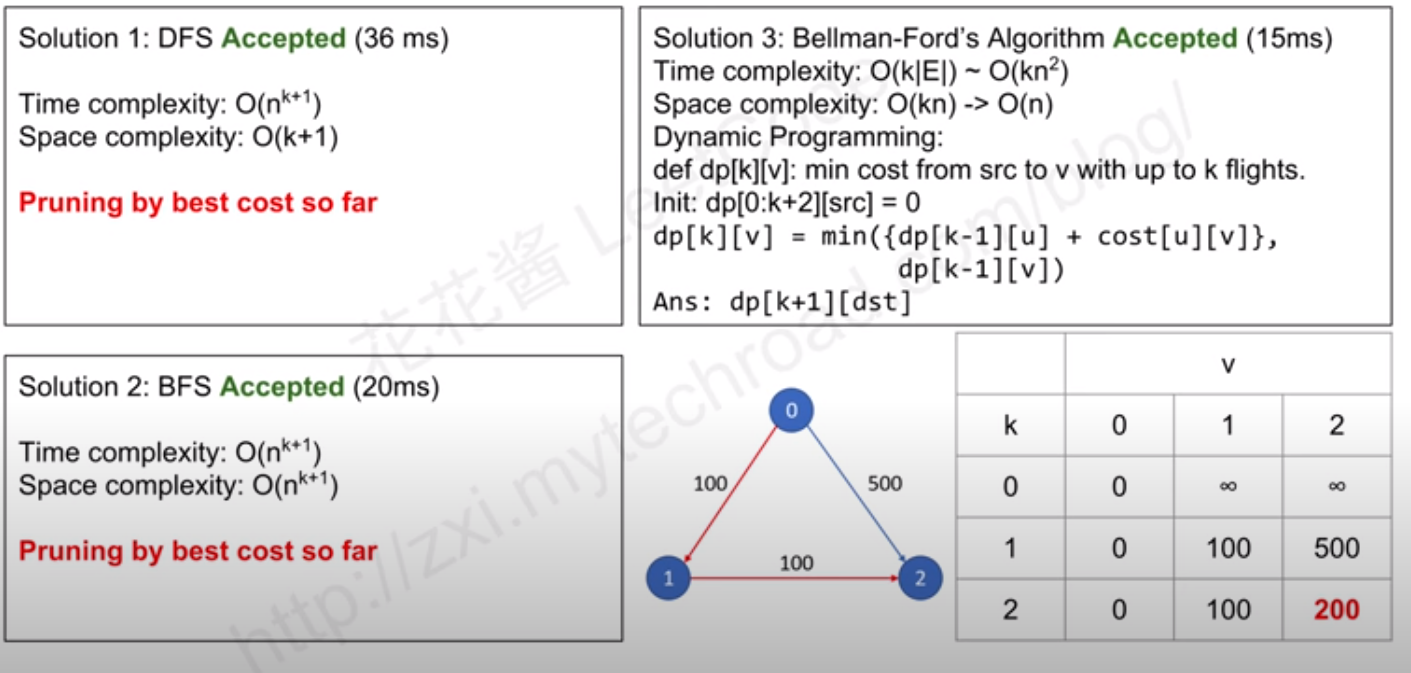

In [10]:
from IPython.display import Image
Image(filename = 'June14.jpg', width=600, height=500)

In [ ]:
def findCheapestPrice(self, n, flights, src, dst, K):
    """
    :type n: int
    :type flights: List[List[int]]
    :type src: int
    :type dst: int
    :type K: int
    :rtype: int
    """
    graph = collections.defaultdict(dict)
    for u, v, e in flights:
        graph[u][v] = e
    ans = float('inf')
    que = collections.deque()
    que.append((src, 0))
    step = 0
    while que:
        size = len(que)
        for i in range(size):
            cur, cost = que.popleft()
            if cur == dst:
                ans = min(ans, cost)
            for v, w in graph[cur].items():
                if cost + w > ans:
                    continue
                que.append((v, cost + w))
        if step > K: break
        step += 1
    return -1 if ans == float('inf') else ans

In [12]:
def findCheapestPrice( n: int, flights, src: int, dst: int, K: int) -> int:
    import collections
    import heapq
    f = collections.defaultdict(dict)
    for u, v, w in flights:
        f[u][v] = w
    print(f)
    # q saves the price to current city, current city, and the remaing steps
    q = [(0, src, K+1)] # initial (price,start,at most K+1)
    while q:
        price, curr, step = heapq.heappop(q)
        if curr == dst:
            return price
        if step > 0:
            for next in f[curr]:
                heapq.heappush(q, (price + f[curr][next], next, step-1))
    return -1

n = 3; flights = [[0,1,100],[1,2,100],[0,2,500]]
src = 0; dst = 2; K = 1
findCheapestPrice(n, flights, src, dst, K)

defaultdict(<class 'dict'>, {0: {1: 100, 2: 500}, 1: {2: 100}})
[(0, 0, 2)]


200

# 15. Search in a Binary Search Tree : BST+recursion

Given the root node of a binary search tree (BST) and a value. You need to find the node in the BST that the node's value equals the given value. Return the subtree rooted with that node. If such node doesn't exist, you should return NULL.

For example,   
Given the tree: [4,2,7,1,3]   
And the value to search: 2  
You should return this subtree: [2,1,3]    
In the example above, if we want to search the value 5, since there is no node with value 5, we should return NULL. 
Note that an empty tree is represented by NULL, therefore you would see the expected output (serialized tree format) as [], not null.

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def searchBST(self, root: TreeNode, val: int) -> TreeNode:
        if not root:
            return None
        if root.val == val:
            return root
        elif root.val < val:
            return self.searchBST(root.right,val)
        else:
            return self.searchBST(root.left,val)

# 16. Validate IP Address

Write a function to check whether an input string is a valid IPv4 address or IPv6 address or neither.  
IPv4 addresses are canonically represented in dot-decimal notation, which consists of four decimal numbers, each ranging from 0 to 255, separated by dots ("."), e.g.,172.16.254.1;  
Besides, leading zeros in the IPv4 is invalid. For example, the address 172.16.254.01 is invalid.

IPv6 addresses are represented as eight groups of four hexadecimal digits, each group representing 16 bits. The groups are separated by colons (":"). For example, the address 2001:0db8:85a3:0000:0000:8a2e:0370:7334 is a valid one. Also, we could omit some leading zeros among four hexadecimal digits and some low-case characters in the address to upper-case ones, so 2001:db8:85a3:0:0:8A2E:0370:7334 is also a valid IPv6 address(Omit leading zeros and using upper cases).

However, we don't replace a consecutive group of zero value with a single empty group using two consecutive colons (::) to pursue simplicity. For example, 2001:0db8:85a3::8A2E:0370:7334 is an invalid IPv6 address.  
Besides, extra leading zeros in the IPv6 is also invalid. For example, the address 02001:0db8:85a3:0000:0000:8a2e:0370:7334 is invalid.

Note: You may assume there is no extra space or special characters in the input string.

Example 1:  
Input: "172.16.254.1"  
Output: "IPv4"  
Explanation: This is a valid IPv4 address, return "IPv4".

Example 2:  
Input: "2001:0db8:85a3:0:0:8A2E:0370:7334"  
Output: "IPv6"  
Explanation: This is a valid IPv6 address, return "IPv6".

Example 3:  
Input: "256.256.256.256"  
Output: "Neither"  
Explanation: This is neither a IPv4 address nor a IPv6 address.

### Idea:
- def isIPV4(ip): judge each decimal number
- def isIPV6(ip): judge each groups of four hexadecimal digits

- if have 3 ".": for loop by using isIPV4(ip)
- if have 7 ":": for loop by using isIPV6(ip)

In [5]:
def validIPAddress(IP: str) -> str:
    def isIPv4(s):
        try: return str(int(s)) == s and 0 <= int(s) <= 255
        except: return False

    def isIPv6(s):
        if len(s) > 4: return False
        try: return int(s, 16) >= 0 and s[0] != '-'
        except: return False

    if IP.count(".") == 3 and all(isIPv4(i) for i in IP.split(".")): 
        return "IPv4"
    if IP.count(":") == 7 and all(isIPv6(i) for i in IP.split(":")): 
        return "IPv6"
    return "Neither"

IP =  "172.16.254.1"
validIPAddress(IP)

'IPv4'

# 17. Surrounded Regions - DFS

Given a 2D board containing 'X' and 'O' (the letter O), capture all regions surrounded by 'X'.  
A region is captured by flipping all 'O's into 'X's in that surrounded region

Example:  
X X X X  
X O O X  
X X O X  
X O X X  
After running your function, the board should be:  
X X X X  
X X X X  
X X X X   
X O X X  
Explanation:  
Surrounded regions shouldn’t be on the border, which means that any 'O' on the border of the board are not flipped to 'X'. Any 'O' that is not on the border and it is not connected to an 'O' on the border will be flipped to 'X'. Two cells are connected if they are adjacent cells connected horizontally or vertically.

### Idea:
- 1. 从边界开始搜索，找到没有被包围的 'O'，改为 'D'
    - dfs从该点找到相邻的没有被包围的其他 'O'，改为 'D'
- 2. update board：遍历将所有未被包围的 'D'改成 'O', 'O'改为 'X'

In [ ]:
def solve(board) -> None:
    """
    Do not return anything, modify board in-place instead.
    """
    
    def dfs(x,y):
        if x < 0 or x > m-1 or y < 0 or y > n-1 or board[x][y] != 'O':
            return 
        board[x][y] = 'D'
        dfs(x,y-1)
        dfs(x,y+1)
        dfs(x-1,y)
        dfs(x+1,y)
        
        
    # from the boarder find the 'O' which are not surrounded by 'X' and dfs to find all connected '0', change it to 'D'
    m, n = len(board), len(board[0])
    for i in range(m):
        dfs(i, 0)
        dfs(i, n-1)
    for j in range(1,n-1):  #index is import
        dfs(0,j)
        dfs(m-1,j)
    
    # update board
    for i in range(m):
        for j in range(n):
            if board[x][y] == 'O':
                board[x][y] = 'X'
            if board[x][y] == 'D':
                board[x][y] = 'O'

# 18. H-Index II

Given an array of citations sorted in ascending order (each citation is a non-negative integer) of a researcher, write a function to compute the researcher's h-index.

According to the definition of h-index on Wikipedia: "A scientist has index h if h of his/her N papers have at least h citations each, and the other N − h papers have no more than h citations each."

Example:  
Input: citations = [0,1,3,5,6]  
Output: 3   
Explanation: [0,1,3,5,6] means the researcher has 5 papers in total and each of them had received 0, 1, 3, 5, 6 citations respectively.  Since the researcher has 3 papers with at least 3 citations each and the remaining two with no more than 3 citations each, her h-index is 3.

Note: If there are several possible values for h, the maximum one is taken as the h-index.  
Follow up: This is a follow up problem to H-Index, where citations is now guaranteed to be sorted in ascending order. Could you solve it in logarithmic time complexity?
Hint 1: xpected runtime complexity is in O(log n) and the input is sorted.

### Idea:
- 求影响力x和不小于该影响力的论文个数的最小值，然后再求这个最小值的最大值。
- 当h=0时表示至少有0篇影响力为0的论文；当h=1时表示至少有1篇影响力为1的论文；当h=3时表示至少有3篇影响力为3的论文；当h=5时表示至少有5篇影响力为5的论文；当h=6时表示至少有6篇影响力为6的论文.显然符合要求的是只要有3篇影响力为3的论文。

In [31]:
def hIndex(citations)->int:
    N = len(citations)
    l, r = 0, N-1
    H = 0 
    while l <= r:
        mid = (l+r)//2
        print(mid,citations[mid],N-mid,H)
        H = max(H,min(citations[mid],N-mid))
        
        if citations[mid] < N-mid:
            l = mid + 1
        else:
            r = mid - 1
    return H
citations = [0,1,3,5,6,7]   
hIndex(citations)

2 3 4 0
4 6 2 3
3 5 3 3


3

In [26]:
def hIndex(citations)->int:
    citations = citations[::-1]
    for i in range(len(citations)):
        if i >= citations[i]:
            return i 
citations = [0,1,3,5,6,7] 
hIndex(citations)

3

# 19. Longest Duplicate Substring

Given a string S, consider all duplicated substrings: (contiguous) substrings of S that occur 2 or more times.  (The occurrences may overlap.) 
Return any duplicated substring that has the longest possible length.  (If S does not have a duplicated substring, the answer is "".)

Example 1:  
Input: "banana"  
Output: "ana"  
    
Example 2:  
Input: "abcd"  
Output: ""  

Note:  
2 <= S.length <= 10^5  
S consists of lowercase English letters. 

#### Hide Hint 1    
**Binary search** for the length of the answer. (If there's an answer of length 10, then there are answers of length 9, 8, 7, ...)
#### Hide Hint #2    
To check whether an answer of length K exists, we can use **Rabin-Karp 's algorithm**.

In [10]:
def longestDupSubstring(S: str) -> str:
    n = len(S)
    sa,rk = [],[]
    for i in range(n):
        rk.append(ord(S[i])-ord('a'))
        sa.append(i)
        
    l,sig = 0,26
    while True:
        p = []
        for i in range(n-l,n):
            p.append(i)
        for i in range(n):
            if sa[i]>=l:
                p.append(sa[i]-l)
        cnt = [0]*sig
        for i in range(n):
            cnt[rk[i]] += 1
        for i in range(1,sig):
            cnt[i] += cnt[i-1]
        for i in range(n-1,-1,-1):
            cnt[rk[p[i]]] -= 1
            sa[cnt[rk[p[i]]]] = p[i]
        def equal(i,j,l):
            if rk[i]!=rk[j]:return False
            if i+l>=n and j+l>=n:
                return True
            if i+l<n and j+l<n:
                return rk[i+l]==rk[j+l]
            return False
        sig = -1
        tmp = [None]*n
        for i in range(n):
            if i==0 or not equal(sa[i],sa[i-1],l):
                sig += 1
            tmp[sa[i]] = sig
        rk = tmp
        sig += 1
        if sig==n:
            break
        l = l<<1 if l>0 else 1
    maxh = k = 0
    idx = None
    for i in range(n):
        if rk[i]>0:
            j = sa[rk[i]-1]
            while i+k<n and j+k<n and S[i+k]==S[j+k]:
                k += 1
            if k>maxh:
                maxh = k
                idx = i
            if k>0:
                k -= 1
    return S[idx:idx+maxh] if idx!=None else ""

S = "banana"
longestDupSubstring(S)

[1, 0, 13, 0, 13, 0] [0, 1, 2, 3, 4, 5]


'ana'

# 20. Permutation Sequence

he set [1,2,3,...,n] contains a total of n! unique permutations.  
By listing and labeling all of the permutations in order, we get the following sequence for n = 3:  
"123"  
"132"  
"213"  
"231"  
"312"  
"321"  
Given n and k, return the kth permutation sequence.  
Note:  
Given n will be between 1 and 9 inclusive.  
Given k will be between 1 and n! inclusive.    
Example 1:  
Input: n = 3, k = 3  
Output: "213"    
Example 2:  
Input: n = 4, k = 9  
Output: "2314" 

### Idea: 回溯法。
- 如何找出第16个（按字典序的）{1,2,3,4,5}的全排列？
    1. 首先用16-1得到15     
    2. 用15去除4! 得到0余15 -- 有0个数比它小的数是1，所以第一位是1  
    3. 用15去除3! 得到2余3  -- 有2个数比它小的数是3，但1已经在之前出现过了所以是4 
    4. 用3去除2! 得到1余1  -- 有1个数比它小的数是2，但1已经在之前出现过了所以是3
    5. 用1去除1! 得到1余0  -- 有1个数比它小的数是2，但1,3,4都出现过了所以是5
    6. 最后一个数只能是2

In [1]:
def getPermutation(n: int, k: int) -> str:
    import math
    numset = list(range(1,n+1))
    res = []
    k = k - 1
    while len(numset) > 1:
        n = n - 1 
        index = k // math.factorial(n) #devisor
        res.append(str(numset[index]))
        k = k % math.factorial(n)      #mod/remainder
        numset.remove(numset[index])
    res.append(str(numset[0])) # 最后剩一个数字直接加在最后
    return ''.join(res)
getPermutation(4,9)

'2314'

# 21. Dungeon Game

The demons had captured the princess (P) and imprisoned her in the bottom-right corner of a dungeon. The dungeon consists of M x N rooms laid out in a 2D grid. Our valiant knight (K) was initially positioned in the top-left room and must fight his way through the dungeon to rescue the princess.

The knight has an initial health point represented by a positive integer. If at any point his health point drops to 0 or below, he dies immediately.

Some of the rooms are guarded by demons, so the knight loses health (negative integers) upon entering these rooms; other rooms are either empty (0's) or contain magic orbs that increase the knight's health (positive integers).  

In order to reach the princess as quickly as possible, the knight decides to move only rightward or downward in each step.  
Write a function to determine the knight's minimum initial health so that he is able to rescue the princess.

For example, given the dungeon below, the initial health of the knight must be at least 7 if he follows the optimal path RIGHT-> RIGHT -> DOWN -> DOWN.  
-2 (K)|-3  |3  
-5   |-10 |1  
10	  |30  |-5(P)  
Note:  
The knight's health has no upper bound.  
Any room can contain threats or power-ups, even the first room the knight enters and the bottom-right room where the princess is imprisoned.

### Idea: DP
- rule
    - the knight's health is no smaller than 1 at last. so 1 is enough.
    - the knight's health should be larger and equal to 1 all the time.
- dp
    - initial dp[m-1][n] = dp[m][n-1] = 1
    - dp[i][j]: the minimum health points needed at position [i,j]
    - algorithm: d[i][j] = min(d[i+1][j],d[i][j+1])-dungeon[i][j]
    - if dp[i][j] < 1, dp[i][j]=1

In [4]:
def calculateMinimumHP(dungeon) -> int:
    m, n = len(dungeon), len(dungeon[0])
    dp = [[float('inf')]*(n+1) for _ in range(m+1)]
    dp[m-1][n] = dp[m][n-1] = 1
    for i in range(m-1,-1,-1):
        for j in range(n-1,-1,-1):
            dp[i][j] = max(min(dp[i+1][j],dp[i][j+1]) - dungeon[i][j], 1)
    return dp[0][0]

# 22. Single Number II

Given a non-empty array of integers, every element appears three times except for one, which appears exactly once. Find that single one.  
Note:Your algorithm should have a linear runtime complexity. Could you implement it without using extra memory?  

Example 1:  
Input: [2,2,3,2]  
Output: 3

Example 2:  
Input: [0,1,0,1,0,1,99]  
Output: 99

In [3]:
def singleNumber(nums) -> int:
    import collections
    d = collections.Counter(nums)
    for key in d:
        if d[key] == 1:
            return key   
nums = [2,2,3,2]
singleNumber(nums)

3

In [8]:
def singleNumber(nums) -> int:
    return int((3 * sum(set(nums)) -sum(nums))/2)
nums = [2,2,3,2]
singleNumber(nums)

3

In [13]:
#three: show up 3 times: only when two=1 and current a: two=1&a
#two: show up 2 times:  two&~a or one&a and ~three(get rid of num which have shown for 3 times)
#one: show up 2 times one time: one^a and ~three

def singleNumber(nums) -> int:
    one = two = 0
    for a in nums:
        three = two & a
        two = (two & ~a) | (one & a) & (~three)
        one = one ^ a & (~three)
    # 假如特殊的数不确定出现了一次还是两次
    # return one | two
    # 假如特殊的数确定只出现了一次
    return one
nums = [2,2,3,2]
singleNumber(nums)

3

# 23. Count Complete Tree Nodes

Given a complete binary tree, count the number of nodes.  
Note:  
Definition of a complete binary tree from Wikipedia:
In a complete binary tree every level, except possibly the last, is completely filled, and all nodes in the last level are as far left as possible. It can have between 1 and 2^h nodes inclusive at the last level h.

Example:  
Input: [1,2,4,5,3,6,null]  
Output: 6

### Idea:
- 假如左子树高度等于右子树高度，则左子树为满二叉树,右子树为完全二叉树。
    - 满二叉树node数量 = 2 ** left_height（包括root)，右子树node数量 by recursion of countNodes函数。
- 假如高度不等，则左子数为完全二叉树，右子树为满二叉树。
- 构建高度函数，求高度只考虑左子树高度即可。

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def countNodes(self, root: TreeNode) -> int:
        if not root:
            return 0
        count = 0
        left_height = self.getHeight(root.left)
        right_height = self.getHeight(root.right)
        if left_height == right_height:
            count = 2 ** left_height + self.countNodes(root.right)
        else: 
            count = 2 ** right_height + self.countNodes(root.left)
        return count
    
    
    def getHeight(self,root):
        height = 0
        while root:
            height += 1
            root = root.left
        return height

# 24. Unique Binary Search Trees

Given n, how many structurally unique BST's (binary search trees) that store values 1 ... n?  
Example:  
Input: 3  
Output: 5  
Explanation: Given n = 3, there are a total of 5 unique BST's:  
[1,null,3,2,null], [3,2,1,null],[3,1,null,2], [2,1,3], [1,null,2,null,3]

### Idea - DP
- state [i]
- initial:dp[0]=1,dp[1]=1
- trans func:Σ_j=0_n-1 [j]x[n-1-j]
- result: [n]

- n = 1: 1
- n = 2: 2
    - root=1, left: [1] ,right:[1] -- 1x1
    - root=2, left: [0],right: [1] -- 1x1
- n = 3: 5
    - root=1, left:[0],right:[2]  -- 1x2
    - root=2. left:[1],right:[1]  -- 1x1
    - root=3, left:[2],right:[0]  -- 2x1 = 5
- summary: 
    - left: [0] ~ [n-1]
    - right:[n-1]~[0]


In [10]:
def numTrees(n: int) -> int:
    if n < 1:
        return 0
    dp = [0]*(n+1)
    dp[0],dp[1] = 1, 1
    for i in range(2,n+1):
        for j in range(i):
            dp[i] += dp[i-1-j]*dp[j]
    return dp[n]
numTrees(n=3)

5

# 25. Find the Duplicate Number

Given an array nums containing n + 1 integers where each integer is between 1 and n (inclusive), prove that at least one duplicate number must exist. Assume that there is only one duplicate number, find the duplicate one.

Example 1:  
Input: [1,3,4,2,2]  
Output: 2 

Example 2:  
Input: [3,1,3,4,2]  
Output: 3  

Note:  
You must not modify the array (assume the array is read only).  
You must use only constant, O(1) extra space.  
Your runtime complexity should be less than O(n^2).  
There is only one duplicate number in the array, but it could be repeated more than once.  

### Idea:
- Solution 1: ultilize set
- Solution 2: Sorting - not meet the requirement 
- Solution 3: Floyd's Tortoise and Hare (Cycle Detection) - 2 pointers

In [14]:
def findDuplicate1(nums)-> int:
    seen = set()
    for num in nums:
        if num in seen:
            return num
        else:
            seen.add(num)      
        
# Time complexity : O(n)
# Space complexity : O(n)

def findDuplicate2(nums)-> int: 
    nums.sort()
    for i in range(1,len(nums)):
        if nums[i] == nums[i-1]:
            return nums[i]
# Time complexity : O(nlgn)
# Space complexity : O(1) (or O(n))

def findDuplicate3(nums):
    # Find the intersection point of the two runners.
    tortoise = hare = nums[0]
    while True:
        tortoise = nums[tortoise] 
        hare = nums[nums[hare]]
        if tortoise == hare:
            break
    # t=[1]=3,   t=[3]=2,    
    # h=[[1]]=2, h =[[2]]=2
    
    # Find the "entrance" to the cycle.
    tortoise = nums[0]
    while tortoise != hare:
        tortoise = nums[tortoise]
        hare = nums[hare]
    # t=1,t=[1]=3,t=[3]=2
    # h=2,h=[2]=4,h=[4]=2,

    return hare
# Time complexity : O(n)
# Space complexity : O(1)

findDuplicate(nums = [1,3,4,2,2])
findDuplicate3(nums= [3,1,3,4,2])

2

3

# 26. Sum Root to Leaf Numbers

Given a binary tree containing digits from 0-9 only, each root-to-leaf path could represent a number.  
An example is the root-to-leaf path 1->2->3 which represents the number 123.   
Find the total sum of all root-to-leaf numbers.  

Note: A leaf is a node with no children.  
Example:  
Input: [1,2,3]  
Output: 25  
Explanation:  
The root-to-leaf path 1->2 represents the number 12.  
The root-to-leaf path 1->3 represents the number 13.  
Therefore, sum = 12 + 13 = 25.  

Example 2:
Input: [4,9,0,5,1]  
Output: 1026  
Explanation:  
The root-to-leaf path 4->9->5 represents the number 495.  
The root-to-leaf path 4->9->1 represents the number 491.  
The root-to-leaf path 4->0 represents the number 40.  
Therefore, sum = 495 + 491 + 40 = 1026.  

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def sumNumbers(self, root: TreeNode) -> int:
        return self._sumNumbers(root,0)

    def _sumNumbers(self, root, preSum):
        if not root:
            return 0
        preSum = preSum * 10 + root.val
        if root.left == None and root.right == None:
            return preSum
        return self._sumNumbers(root.left, preSum) + self._sumNumbers(root.right, preSum)

# 27. Perfect Squares

Given a positive integer n, find the least number of perfect square numbers (for example, 1, 4, 9, 16, ...) which sum to n.  
Example 1:  
Input: n = 12  
Output: 3   
Explanation: 12 = 4 + 4 + 4.

Example 2:  
Input: n = 13  
Output: 2  
Explanation: 13 = 4 + 9.

### Idea: -- DP
- dp[i]表示 i 最少可以由几个平方数构成。
- 初试化dp=[0,1,2,⋯,n]，长度为n+1，最多次数就是全由1构成。
- 遍历dp，对于i，遍历区间[2,n+1):
    - 遍历所有平方数小于i的数j，遍历区间[1,int(i√)+1)
    - dp[i]=min(dp[i],dp[i−j∗j]+1) 始终保存所有可能情况中的最小值。
    - 返回dp[n]

In [14]:
def numSquares(n: int) -> int:
    dp=[i for i in range(n+1)]
    print(dp)
    for i in range(2,n+1):
        for j in range(1,int(i**0.5)+1):
            dp[i]=min(dp[i],dp[i-j*j]+1)
    print(dp)
    return dp[-1]  
numSquares(12)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 1, 2, 3, 1, 2, 3, 4, 2, 1, 2, 3, 3]


3

# 28. Reconstruct Itinerary

Given a list of airline tickets represented by pairs of departure and arrival airports [from, to], reconstruct the itinerary in order. All of the tickets belong to a man who departs from JFK. Thus, the itinerary must begin with JFK.

Note:  
If there are multiple valid itineraries, you should return the itinerary that has the smallest lexical order when read as a single string.   For example, the itinerary ["JFK", "LGA"] has a smaller lexical order than ["JFK", "LGB"].  
All airports are represented by three capital letters (IATA code).  
You may assume all tickets form at least one valid itinerary.  
One must use all the tickets once and only once.

Example 1:  
Input: [["MUC", "LHR"], ["JFK", "MUC"], ["SFO", "SJC"], ["LHR", "SFO"]]  
Output: ["JFK", "MUC", "LHR", "SFO", "SJC"]  

Example 2:  
Input: [["JFK","SFO"],["JFK","ATL"],["SFO","ATL"],["ATL","JFK"],["ATL","SFO"]]  
Output: ["JFK","ATL","JFK","SFO","ATL","SFO"]  
Explanation: Another possible reconstruction is ["JFK","SFO","ATL","JFK","ATL","SFO"].But it is larger in lexical order.

### Idea: Directed graph + collections.defaultdict + post-order

这道题的本质是计算一个最"小"的欧拉路径(Eulerian path)。对于一个节点（当然先从JFK开始)，贪心地访问最小的邻居，访问过的边全部删除。当碰到死路的时候就回溯到最近一个还有出路的节点，然后把回溯的路径放到最后去访问，这个过程和后序遍历的一样。
- 1. 如果子节点没有死路（每个节点都只左子树），前序遍历便是欧拉路径。
- 2. 如果子节点1是死路，子节点2完成了遍历，那么子节点2先要被访问。1，2都和后序遍历的顺序正好相反。

其中，如果碰到死路，而没有把所有的边都走过一遍的话，就说明这种走法不满足itinerary，需要沿着树根向上找到最近的一个有其他路可以走的节点N，把新的路走一遍。因为题目保证一定存在一条满足要求的itinerary路径，那么一条这样的死路，一定会相对的在这个节点N上存在另一条路，这条路存在一个回到该节点N的环。先把这个环走过之后再去走这条死路，就可以保证把以N为树根的这个路径上的所有点都走到。

首先肯定是要把路径保存成链表法表示的图的。然后对每个顶点的所有邻接顶点进行排序，这样我们每次都优先选择字典序最小的那个顶点作为下次遍历的节点。我们做了后序遍历即可。最后还要把后序遍历的结果再翻转，才是从根节点出发到每个位置的路径。

In [27]:
def findItinerary (tickets):
    import collections
    graph = collections.defaultdict(list)
    for frm, to in tickets:
        graph[frm].append(to)
    for frm, tos in graph.items():
        tos.sort(reverse=True)
        
    res = []
    self.dfs(graph,"JFK",res)
    return res[::-1]
    
def dfs(self,graph,source,res):
    while graph[source]:
        v = graph[source].pop()
        self.dfs(graph,v,res)
    res.append(source)

# 28. Unique Paths

A robot is located at the top-left corner of a m x n grid (marked 'Start' in the diagram below). 
The robot can only move either down or right at any point in time. The robot is trying to reach the bottom-right corner of the grid (marked 'Finish' in the diagram below).  
How many possible unique paths are there?

Example 1:  
Input: m = 3, n = 2  
Output: 3  
Explanation:  
From the top-left corner, there are a total of 3 ways to reach the bottom-right corner:  
1. Right -> Right -> Down  
2. Right -> Down -> Right  
3. Down -> Right -> Right 

Example 2:  
Input: m = 7, n = 3  
Output: 28  

Constraints:  
1 <= m, n <= 100  
It's guaranteed that the answer will be less than or equal to 2 * 10 ^ 9.

### Idea:
- Solution 1. permutation and combination
- Solution 2. DP 

In [ ]:
def uniquePaths(self, m: int, n: int) -> int:
    return int(math.factorial(m+n-2)/math.factorial(m-1)/math.factorial(n-1))

In [15]:
def uniquePaths(m: int, n: int) -> int:
    dp = [[0] * n for _ in range(m)]
    dp
    for i in range(m):
        for j in range(n):
            if i == 0 or j == 0:
                dp[i][j] = 1
                continue
            dp[i][j] = dp[i-1][j] + dp[i][j-1]
    return dp
    return dp[-1][-1]

m, n = 3, 2
uniquePaths(m,n)

[[1, 1], [1, 2], [1, 3]]

# 30. Word Search II

Given a 2D board and a list of words from the dictionary, find all words in the board.  
Each word must be constructed from letters of sequentially adjacent cell, where "adjacent" cells are those horizontally or vertically neighboring. The same letter cell may not be used more than once in a word.

Example:  
Input:   
board = [  
  ['o','a','a','n'],  
  ['e','t','a','e'],  
  ['i','h','k','r'],  
  ['i','f','l','v'] ]  
words = ["oath","pea","eat","rain"]  
Output: ["eat","oath"]  
    
Note:  
All inputs are consist of lowercase letters a-z.  
The values of words are distinct.

Hint #1    
You would need to optimize your backtracking to pass the larger test. Could you stop backtracking earlier?  
Hint #2    
If the current candidate does not exist in all words' prefix, you could stop backtracking immediately. What kind of data structure could answer such query efficiently? Does a hash table work? Why or why not? How about a Trie? If you would like to learn how to implement a basic trie, please work on this problem: Implement Trie (Prefix Tree) first.

### Idea:
1. create a data structure >> **"Trie"**
2. go over each cell on board - DFS

In [14]:
def findWords(board, words):
    
    def DFS(i,j,trie,path):
        # when find the last char
        if '*' in trie:
            res.add(path)
        if i < 0 or i >= len(board) or j < 0 or j >= len(board[0]) or board[i][j] not in trie:
            return
        temp = board[i][j]
        board[i][j] = 0
        DFS(i+1,j,trie[temp],path+temp)
        DFS(i-1,j,trie[temp],path+temp)
        DFS(i,j+1,trie[temp],path+temp)
        DFS(i,j-1,trie[temp],path+temp)
        board[i][j] = temp
        
    trie = {}
    for word in words:
        temp = trie # temp: pointer
        for c in word:
            if c not in temp:
                temp[c] = {} # when not in temp, generate an empty node
            temp = temp[c] # move pointer to the current node
        temp['*'] = '*' # terminating character
    print(trie)
    
    res = set()
    # main search
    for i in range(len(board)):
        for j in range(len(board[0])):
            DFS(i,j,trie,'')
    return res

In [15]:
board = [  
  ['o','a','a','n'],  
  ['e','t','a','e'],  
  ['i','h','k','r'],  
  ['i','f','l','v'] ]  
words = ["oath","pea","eat","rain"]
findWords(board, words)

{'o': {'a': {'t': {'h': {'*': '*'}}}}, 'p': {'e': {'a': {'*': '*'}}}, 'e': {'a': {'t': {'*': '*'}}}, 'r': {'a': {'i': {'n': {'*': '*'}}}}}


{'eat', 'oath'}

In [14]:
import numpy as np
W = np.array([[3, -1/2],[-1/2, 3]])
B = np.array([[13,3/2],[2/3,13]])
Winv = np.linalg.inv(W)
J2 = np.dot(Winv,B)
J2

array([[4.4952381 , 1.25714286],
       [0.97142857, 4.54285714]])